### Masive Data Assignment
 (second project)
Read, Clean, and prepare the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### litecoin_price

#### 1. Read the Data

In [2]:
# Read Bitcoin Cash Price
df = pd.read_csv('../data/raw/litecoin_price.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,65.25,72.44,59.05,71.29,1016090000,3444150000
1,2017-09-04,76.73,76.73,61.24,65.21,922041000,4049140000
2,2017-09-03,78.98,82.83,73.61,76.84,675462000,4166600000
3,2017-09-02,85.83,92.07,72.23,79.02,1363990000,4526680000
4,2017-09-01,70.86,87.41,70.01,86.04,1551740000,3735870000


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [4]:
df.count()

Date          1592
Open          1592
High          1592
Low           1592
Close         1592
Volume        1592
Market Cap    1592
dtype: int64

as we can see we have in this file 7 columns and each column has 1592 cells

In [5]:
df.describe()

,Open,High,Low,Close,Market Cap
count,1592.000000,1592.000000,1592.000000,1592.000000,1.592000e+03
mean,8.470741,8.870232,8.068172,8.510704,3.430766e+08
std,11.536448,12.246791,10.817646,11.641428,5.718122e+08
min,1.150000,1.340000,1.110000,1.160000,3.794370e+07
25%,3.050000,3.120000,2.970000,3.050000,1.186832e+08
50%,3.840000,3.880000,3.780000,3.835000,1.702760e+08
75%,7.780000,8.180000,7.552500,7.790000,2.432428e+08
max,85.830000,92.070000,73.610000,86.040000,4.526680e+09


In [6]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 7 columns):
Date          1592 non-null datetime64[ns]
Open          1592 non-null float64
High          1592 non-null float64
Low           1592 non-null float64
Close         1592 non-null float64
Volume        1592 non-null object
Market Cap    1592 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 87.2+ KB


In [7]:
#check if the dataset is duplicated
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1587    False
1588    False
1589    False
1590    False
1591    False
Length: 1592, dtype: bool

as we can see the data fram has 7 columns. each column has 85 cells, and there is no missing data, 
* Volume data type is object, we have to convert them to number. 

In [8]:
# Count missing data in each column
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

we can see there is no missing data 

#### 2. Cleaning Data

as i mentioned before the "Volume and Market Cap" have different format and python concedered that as a string not number, also we have some missing data in the Market Cap column 
so we have to convert all strings into number and 
     

In [10]:
print('Volume Data Type :', type(df.Volume[0]))
print('Market Cap Data Type :', type(df['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'numpy.int64'>


In [13]:
# If Volume is equal to '-' convert it to 0
df.loc[df['Volume']=="-",'Volume']=0

In [15]:
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df.Volume = df.Volume.apply(convert_to_number)

df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1592.000000,1592.000000,1592.000000,1592.000000,1.592000e+03,1.592000e+03
mean,8.470741,8.870232,8.068172,8.510704,3.258194e+07,3.430766e+08
std,11.536448,12.246791,10.817646,11.641428,1.251404e+08,5.718122e+08
min,1.150000,1.340000,1.110000,1.160000,0.000000e+00,3.794370e+07
25%,3.050000,3.120000,2.970000,3.050000,1.264770e+06,1.186832e+08
50%,3.840000,3.880000,3.780000,3.835000,2.417280e+06,1.702760e+08
75%,7.780000,8.180000,7.552500,7.790000,5.838882e+06,2.432428e+08
max,85.830000,92.070000,73.610000,86.040000,1.730780e+09,4.526680e+09


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 7 columns):
Date          1592 non-null datetime64[ns]
Open          1592 non-null float64
High          1592 non-null float64
Low           1592 non-null float64
Close         1592 non-null float64
Volume        1592 non-null int64
Market Cap    1592 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 87.2 KB


In [18]:
# correlation between columns
correlation = df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.996085,0.995994,0.993389,0.706445,0.960598
High,0.996085,1.000000,0.993733,0.997791,0.726724,0.954464
Low,0.995994,0.993733,1.000000,0.995921,0.704435,0.962829
Close,0.993389,0.997791,0.995921,1.000000,0.724833,0.956627
Volume,0.706445,0.726724,0.704435,0.724833,1.000000,0.778434
Market Cap,0.960598,0.954464,0.962829,0.956627,0.778434,1.000000


let's plot data between Market Cap and other variable, then see the relation between the data


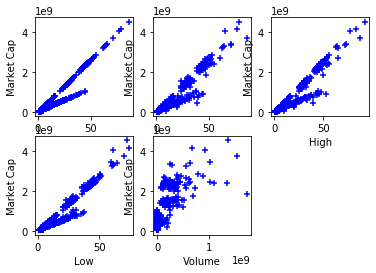

In [19]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='blue')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(df.Open, df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(df.Close, df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(df.High, df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(df.Low, df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(df.Volume, df['Market Cap'],'Volume')

In [20]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = df[['Open']]
Market_Cap  = df['Market Cap']

In [21]:
# train data using linear regression 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Model Score
model.score(Open, Market_Cap)

0.922747637613941

#### 4. Data Visualization

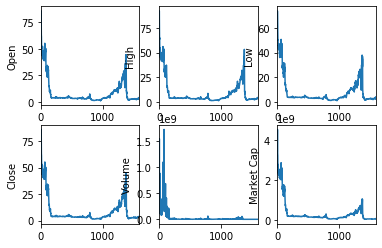

In [23]:
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df.Open.plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df.High.plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df.Low.plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df.Close.plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df.Volume.plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df['Market Cap'].plot()